# Group Members
Pierre Mercatoris – Pablo Bordons Estrada - Sergio Gámez Ruiz de Olano – Mohammadmehdi
Fayazbakhsh

In [149]:
%matplotlib notebook
from __future__ import division
import numpy as np
import time

nsample = 1000
nvariables = 100
X0=np.ones([nsample, 1])
X1=np.random.uniform(0, 10, ([nsample,nvariables]))
X=np.concatenate([X0, X1], axis=1)
error=np.random.normal(0, 1, (nsample,1)) # Normal random error
beta=np.random.uniform(-5, 5, size=([nvariables+1, 1]))
Y=np.dot(X, beta)+error
print(beta)

[[-0.05690932]
 [ 2.15828544]
 [-0.29490484]
 [-1.34581168]
 [ 2.20117406]
 [ 0.42397514]
 [-0.82398851]
 [ 1.81364924]
 [ 0.86747039]
 [-2.34873849]
 [-3.12359089]
 [ 0.77057558]
 [-2.1589737 ]
 [-1.38827103]
 [ 4.07756484]
 [ 0.47152892]
 [ 4.84450501]
 [-1.59458199]
 [-2.22242756]
 [-2.45162542]
 [ 4.72223683]
 [-2.59559141]
 [ 3.52338894]
 [ 0.42372921]
 [-4.39296816]
 [ 4.9300793 ]
 [ 3.28390125]
 [-3.48180498]
 [ 0.4424662 ]
 [-1.55505248]
 [ 0.79581748]
 [-2.39816166]
 [ 4.56861057]
 [ 3.43376717]
 [-0.40535386]
 [-4.93319533]
 [-3.04623369]
 [ 3.43226599]
 [ 4.08190336]
 [ 3.12074063]
 [ 2.46781386]
 [ 4.03163691]
 [ 0.81221959]
 [-2.75377155]
 [ 1.46057359]
 [ 2.71381628]
 [-0.2182772 ]
 [-3.74828416]
 [ 0.77882295]
 [-1.52293682]
 [-1.0528976 ]
 [ 3.46469324]
 [ 1.17731988]
 [-1.44375179]
 [ 1.86703311]
 [ 1.16419156]
 [-0.65375555]
 [ 3.36138624]
 [-4.78147052]
 [ 3.77156093]
 [-4.47780241]
 [-1.20691726]
 [-3.03328124]
 [-0.81653562]
 [-2.77165264]
 [-0.97350498]
 [-3.88910

## A)
Estimate the value of the regression coefficients by using the analytical solution for the least squares
estimation problem.

In [150]:
## a

time_start = time.clock()
beta_ls_exact=np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(X),X)),np.transpose(X)),Y)
time_elapsed = (time.clock() - time_start)
print('time elapsed=',time_elapsed)
print(beta_ls_exact)

('time elapsed=', 0.0020424515823833644)
[[-0.3312345 ]
 [ 2.16987542]
 [-0.28006731]
 [-1.31305434]
 [ 2.19739725]
 [ 0.44376467]
 [-0.80317061]
 [ 1.78171474]
 [ 0.86218419]
 [-2.35206709]
 [-3.12369441]
 [ 0.77103314]
 [-2.1632876 ]
 [-1.39316238]
 [ 4.07568713]
 [ 0.48383819]
 [ 4.84787724]
 [-1.60251216]
 [-2.20112221]
 [-2.44010841]
 [ 4.72084042]
 [-2.5988558 ]
 [ 3.51103899]
 [ 0.43600634]
 [-4.40913056]
 [ 4.92905925]
 [ 3.30386352]
 [-3.4871993 ]
 [ 0.43682339]
 [-1.54447007]
 [ 0.77569753]
 [-2.39747555]
 [ 4.57656095]
 [ 3.44596201]
 [-0.41281857]
 [-4.93252925]
 [-3.04748605]
 [ 3.43188028]
 [ 4.05860479]
 [ 3.12379721]
 [ 2.45743472]
 [ 4.03179014]
 [ 0.79943249]
 [-2.75591577]
 [ 1.47760098]
 [ 2.6972209 ]
 [-0.22030008]
 [-3.74281122]
 [ 0.76913766]
 [-1.51314453]
 [-1.06266655]
 [ 3.47974865]
 [ 1.17897966]
 [-1.43705443]
 [ 1.893623  ]
 [ 1.16010023]
 [-0.66102509]
 [ 3.3591382 ]
 [-4.78528607]
 [ 3.76512667]
 [-4.48112468]
 [-1.21357384]
 [-3.02453052]
 [-0.82846868]

## B

[1.5263120378225907, 3.9156121236269756, 3.2635193896499768, 8.3142427303192932, 11.139360760558176, 2.60193068785295, 12.777884974957649, 15.529777222334781, 2.4679327030443652, 4.7200415767502459, 8.8779346441501001, 6.7144220174517226, 23.610962549133543, 11.68521014338045, 10.735864616795785, 8.0903777800296144, 5.4175998134987493, 10.166686468895984]


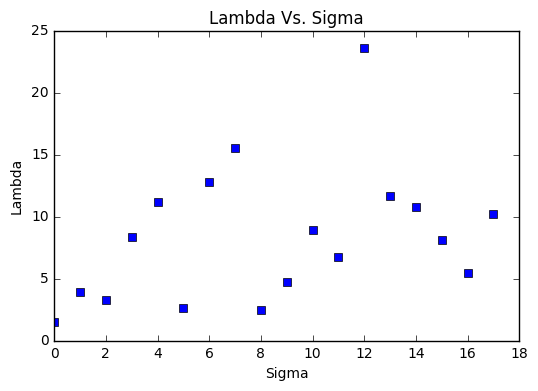

In [151]:
# b

import matplotlib.pyplot as plt
%matplotlib inline
lambda_est=[]
sigma=np.arange(1,10, 0.5)

for i in sigma :
    error=np.random.normal(0, i, (nsample,1)) # Normal random error with different sigma
    Y=np.dot(X, beta)+error
    beta_ls_exact=np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(X),X)),np.transpose(X)),Y)
    lambda_est.append((np.linalg.norm(beta-beta_ls_exact,ord=2)/np.linalg.norm(beta,ord=2))*100)
    
print lambda_est


plt.plot(lambda_est, 'bs')
plt.xlabel('Sigma')
plt.ylabel('Lambda')
plt.title('Lambda Vs. Sigma')
plt.show()

## C)
Estimate the value of the regression coefficients (least squares) by using the tool minimize from the
python package Scipy.optimize. Try at least three available solvers and compare their performance
(iterations, function, gradient and hessian evaluations as well as total computational time).


In [152]:
# c : Newton-CG

def least_sq_reg_der(beta_ls,X,Y):
    beta_ls=np.matrix(beta_ls)
    pp=-2*np.dot(np.transpose(Y-np.dot(X,np.transpose(beta_ls))),X)
    return np.squeeze(np.asarray(pp))
        
        
def least_sq_reg_hess(beta_ls,X,Y):
    return 2*np.dot(np.transpose(X),X)



time_start = time.clock()
#run your code
                   
res = minimize(least_sq_reg, beta_ls0, args=(X,Y), method = 'Newton-CG',jac=least_sq_reg_der, hess=least_sq_reg_hess, options = {'disp': True})
time_elapsed = (time.clock() - time_start) 
print('time elapsed=',time_elapsed)
print(res.x)
np.linalg.inv(least_sq_reg_hess(res.x,X,Y))
print('error=',np.linalg.norm(np.transpose(beta_ls_exact)-res.x,ord=2)/np.linalg.norm(np.transpose(beta_ls_exact),ord=2))


Optimization terminated successfully.
         Current function value: 80069.171195
         Iterations: 15
         Function evaluations: 18
         Gradient evaluations: 32
         Hessian evaluations: 15
('time elapsed=', 0.020329796010628343)
[ 2.52907023  2.42614164 -0.41632141 -1.40731497  2.17454426  0.18096219
 -0.86563098  1.82734867  0.8954817  -2.37274123 -2.98026418  0.86919563
 -2.12799    -1.33734538  3.96333728  0.39168058  4.90934384 -1.49930136
 -2.20653887 -2.4521232   4.54475819 -2.509499    3.44278426  0.40179246
 -4.20758     4.73542469  3.16544822 -3.38493409  0.40813378 -1.50592527
  0.90518528 -2.54794857  4.62552053  3.52342176 -0.375623   -4.98891832
 -3.08688432  3.42572591  3.91629563  2.99467011  2.38395674  4.09115926
  0.98062699 -2.74329505  1.54618301  2.57435891 -0.24873628 -3.87749783
  0.81226377 -1.52292466 -1.01979152  3.44045897  1.17340441 -1.47480637
  1.96311657  1.13023595 -0.79217391  3.49589603 -4.58586374  3.64191904
 -4.52272112 -1.31597

In [164]:
# c :BFGS
from scipy.optimize import minimize


def least_sq_reg(beta_ls, X, Y):
    beta_ls=np.matrix(beta_ls)
    z=Y-X*np.transpose(beta_ls)
    return np.dot(np.transpose(z),z) #sum of the square errors, value of the obj function

beta_ls0 = np.zeros(nvariables+1) #we need to initiate our initial point
time_start = time.clock()
res = minimize(least_sq_reg, beta_ls0, args=(X,Y), method = 'BFGS', options = {'disp': True}) #arguments for the model are X and Y
time_elapsed = (time.clock() - time_start)
print('time elapsed=',time_elapsed)
print (res.x) 
print('error=',np.linalg.norm(np.transpose(beta_ls_exact)-res.x,ord=2)/np.linalg.norm(np.transpose(beta_ls_exact),ord=2))



         Current function value: 80069.171181
         Iterations: 124
         Function evaluations: 23691
         Gradient evaluations: 230
('time elapsed=', 1.4183544163533952)
[ 2.52919709  2.42614579 -0.4163286  -1.40731715  2.1745403   0.18095672
 -0.86562913  1.82734177  0.89547621 -2.37274956 -2.98026243  0.86919653
 -2.12799218 -1.33734602  3.96333955  0.39168156  4.90935211 -1.49929784
 -2.20653837 -2.45213604  4.54474867 -2.50949541  3.44278643  0.40178934
 -4.20757911  4.73542244  3.16545021 -3.38493125  0.40812188 -1.5059241
  0.90518818 -2.54795349  4.62552112  3.52342335 -0.37562198 -4.98891744
 -3.08687982  3.42573121  3.91629758  2.99467647  2.38395901  4.09116047
  0.98061959 -2.74329385  1.54618723  2.57436218 -0.248741   -3.87750168
  0.81225978 -1.52292348 -1.01978847  3.44045308  1.17341042 -1.47481482
  1.96312072  1.13022637 -0.79217751  3.49589995 -4.58586708  3.64192139
 -4.52271991 -1.31598103 -2.94847048 -0.95579513 -2.7060459  -0.93610872
 -3.94129548 -2.1

In [165]:
# c :SLSQP
from scipy.optimize import minimize


def least_sq_reg(beta_ls, X, Y):
    beta_ls=np.matrix(beta_ls)
    z=Y-X*np.transpose(beta_ls)
    return np.dot(np.transpose(z),z) #sum of the square errors, value of the obj function

beta_ls0 = np.zeros(nvariables+1) #we need to initiate our initial point
time_start = time.clock()
res = minimize(least_sq_reg, beta_ls0, args=(X,Y), method = 'SLSQP', options = {'disp': True}) #arguments for the model are X and Y
time_elapsed = (time.clock() - time_start)
print('time elapsed=',time_elapsed)
print (res.x) 
print('error=',np.linalg.norm(np.transpose(beta_ls_exact)-res.x,ord=2)/np.linalg.norm(np.transpose(beta_ls_exact),ord=2))


Optimization terminated successfully.    (Exit mode 0)
            Current function value: [[ 80069.17198142]]
            Iterations: 69
            Function evaluations: 7376
            Gradient evaluations: 69
('time elapsed=', 0.44362244810326956)
[ 2.529688    2.42611795 -0.41628274 -1.40732997  2.17452321  0.18097296
 -0.86566037  1.82733167  0.89545756 -2.37274109 -2.98026287  0.86921388
 -2.12799598 -1.33736559  3.96339104  0.39167046  4.90936054 -1.49930577
 -2.20650607 -2.45209934  4.54480494 -2.50945927  3.44277718  0.4017845
 -4.20755144  4.73536521  3.16546231 -3.38488517  0.40808322 -1.50594605
  0.90522338 -2.54797421  4.62549362  3.52351576 -0.37560542 -4.9888371
 -3.08694956  3.425699    3.9163188   2.99466534  2.38400526  4.09106594
  0.98064769 -2.74332967  1.54621079  2.5743337  -0.24872238 -3.87753292
  0.81225753 -1.5228928  -1.01981257  3.44046426  1.17337865 -1.47481359
  1.96319445  1.13022121 -0.79221627  3.49593262 -4.58587543  3.64190782
 -4.52280165 -1.316

In [155]:
# c : CG

def least_sq_reg_der(beta_ls,X,Y):
    beta_ls=np.matrix(beta_ls)
    pp=-2*np.dot(np.transpose(Y-np.dot(X,np.transpose(beta_ls))),X)
    return np.squeeze(np.asarray(pp))
        
        
def least_sq_reg_hess(beta_ls,X,Y):
    return 2*np.dot(np.transpose(X),X)



time_start = time.clock()
#run your code
                   
res = minimize(least_sq_reg, beta_ls0, args=(X,Y), method = 'CG',jac=least_sq_reg_der, hess=least_sq_reg_hess, options = {'disp': True})
time_elapsed = (time.clock() - time_start) 
print('time elapsed=',time_elapsed)
print(res.x)
np.linalg.inv(least_sq_reg_hess(res.x,X,Y))
print('error=',np.linalg.norm(np.transpose(beta_ls_exact)-res.x,ord=2)/np.linalg.norm(np.transpose(beta_ls_exact),ord=2))


         Current function value: 80069.171181
         Iterations: 202
         Function evaluations: 526
         Gradient evaluations: 514
('time elapsed=', 0.10616097607999109)
[ 2.52937819  2.42614537 -0.416329   -1.40731747  2.17453981  0.18095622
 -0.86562976  1.82734152  0.89547595 -2.37275002 -2.98026279  0.8691962
 -2.12799268 -1.33734636  3.96333928  0.39168133  4.90935173 -1.49929801
 -2.20653862 -2.45213626  4.54474815 -2.50949559  3.44278617  0.40178923
 -4.20757945  4.73542192  3.16544979 -3.38493149  0.40812153 -1.50592435
  0.90518777 -2.54795406  4.62552082  3.52342293 -0.37562251 -4.98891794
 -3.08688004  3.42573093  3.91629732  2.99467597  2.3839587   4.09115999
  0.98061908 -2.7432944   1.54618677  2.57436187 -0.24874123 -3.87750204
  0.81225939 -1.52292386 -1.01978884  3.44045272  1.17340995 -1.47481519
  1.96312049  1.13022595 -0.79217785  3.49589968 -4.58586759  3.6419209
 -4.52272037 -1.31598116 -2.94847069 -0.95579534 -2.7060463  -0.93610922
 -3.94129579 -2.115

In [157]:
# c : COBYLA

def least_sq_reg_der(beta_ls,X,Y):
    beta_ls=np.matrix(beta_ls)
    pp=-2*np.dot(np.transpose(Y-np.dot(X,np.transpose(beta_ls))),X)
    return np.squeeze(np.asarray(pp))
        
        
def least_sq_reg_hess(beta_ls,X,Y):
    return 2*np.dot(np.transpose(X),X)



time_start = time.clock()
#run your code
                   
res = minimize(least_sq_reg, beta_ls0, args=(X,Y), method = 'COBYLA',jac=least_sq_reg_der, hess=least_sq_reg_hess, options = {'disp': True})
time_elapsed = (time.clock() - time_start) 
print('time elapsed=',time_elapsed)
print(res.x)
np.linalg.inv(least_sq_reg_hess(res.x,X,Y))
print('error=',np.linalg.norm(np.transpose(beta_ls_exact)-res.x,ord=2)/np.linalg.norm(np.transpose(beta_ls_exact),ord=2))


('time elapsed=', 1.6146098222234286)
[ 1.34815496  0.47756379  0.63043872 -1.34886294  1.12344651  1.04690569
  1.07372316  0.95661121  1.31605102  0.95386434  0.95333823  0.69837543
  0.98819449  0.34129671  2.21643765  1.06664631  2.64677255  0.44140418
  0.5431325   0.18055772  2.54372145  0.01848592  2.53950351  1.71502238
 -0.39659643  1.74490313  1.55172608 -1.10017101  0.88791668 -0.34086246
  0.92257862 -1.43950674  0.8148101   1.36311721 -0.07739261 -1.00650106
 -0.58005414 -0.23059188  0.49831057  0.77157136  1.04438582  0.95009683
 -0.40022328 -0.05278119  0.41184307  0.53997451  0.90977278 -0.92095567
 -0.21444047  0.62336529 -0.55493285  0.88743095 -0.51135637  0.1360919
  0.46035737  0.43666156  0.42262037  0.59947066 -0.55550073  0.41787204
 -1.38154099 -0.23727933 -0.97614738  0.01417302 -1.21297736 -0.01925373
 -1.17015599  0.38207876  0.57973876 -0.22721596 -0.7550735  -0.07090566
  0.69169383  0.38120511  0.28981997 -1.5746251   0.3747195  -0.50498812
 -0.04605738  

## D)
Considering again the least squares estimation problem, estimate the value of the regression coefficients
by implementing the:

i. Gradient method

ii. Newton method

iii. Quasi-Newton method

Consider a like search technique to improve the algorithm convergence, e.x., Armijo rule. Compare the
performance of these algorithms (iterations, function, gradient and hessian evaluations as well as total
computational time).

In [159]:
#definitinition of OF #objective function
def least_sq_reg(beta_ls, X, Y):
    beta_ls=np.matrix(beta_ls)
    z=Y-X*np.transpose(beta_ls)
    return np.transpose(z)*z

#definition of Gradient
def least_sq_reg_der(beta_ls,X,Y):
    beta_ls=np.matrix(beta_ls)
    pp=-2*np.transpose(Y-X*np.transpose(beta_ls))*X
    aa= np.squeeze(np.asarray(pp))
    return aa

#definition of hessian
def least_sq_reg_hess(beta_ls,X,Y):
    ss=2*np.dot(np.transpose(X),X)
    return ss

## Gradient method

 $\rightarrow$ From an initial iterate $x_0$

$\rightarrow$ Compute search (descent) directions $p_k$

$\rightarrow$ Far from the solution, compute a steplength $\alpha_k>0$

$\rightarrow$ Movement:
$$x_{k+1} = x_k + \alpha_k\ p_k$$
Until convergence to a local solution

In [160]:
### d -- i) Gradient method (Without Armijo Rule)

(a,b)=X.shape
beta_lsg=np.zeros(b) #initial value for beta
alpha= 0.0000000001  ###0.00005
n_iter=100000 #maximim nunber iteration
OF_iter=np.zeros(n_iter)
tol_iter=np.zeros(n_iter)
alpha_iter=np.zeros(n_iter)
i=0;
tol=1000; # Tolerance
epsilon=1e-3;

time_start = time.clock()
while (i <= n_iter-2) and (tol>epsilon):
    i=i+1
    grad=least_sq_reg_der(beta_lsg,X,Y) #this function gives us the value of the gradient
    ddirect=-grad
    beta_lsg=beta_lsg+alpha*ddirect
    OF_iter[i]=least_sq_reg(beta_lsg,X,Y) # Objective Function ---Residuals
    tol=np.linalg.norm(grad,ord=2)
    tol_iter[i]=tol
    
time_elapsed = (time.clock() - time_start) 
print('time elapsed=',time_elapsed)
print('iterations',i)
print(OF_iter[i])
print(beta_lsg)
print(np.transpose(beta_ls_exact))
print('Tolerance=',tol)
print('error=',np.linalg.norm(np.transpose(beta_ls_exact)-beta_lsg,ord=2)/np.linalg.norm(beta_lsg,ord=2))


('time elapsed=', 20.377335144672543)
('iterations', 99999)
4453518.4028
[ 0.05282976  0.64113981  0.07209548  0.04871036  0.43447612  0.16998291
  0.109676    0.70771936  0.33319051  0.00233326 -0.26011946  0.29555244
  0.06487088  0.0818291   0.70434035  0.44122414  0.68690641 -0.11269109
 -0.16002377 -0.08491781  0.87603946 -0.18475172  0.63171682  0.26130579
 -0.57336813  0.94909169  0.61983924 -0.33247985  0.31993902 -0.00964228
  0.51786303 -0.37165651  0.71446156  0.9968811   0.18255093 -0.64136729
 -0.10293328  0.7849801   0.88457105  0.57576728  0.56615348  0.85068567
  0.32213325 -0.01408248  0.55557692  0.65794985  0.40269202 -0.26370334
  0.39563088 -0.00946688  0.13986133  0.65418044  0.29889514 -0.01626181
  0.61194155  0.2427539   0.21023681  0.9901915  -0.35360858  0.90587343
 -0.51649615  0.02321486 -0.32545866 -0.00497301 -0.54980912  0.02779685
 -0.35852151 -0.01666443  0.72364021  0.38795701 -0.43488529  0.71334236
  0.20035609  0.93571903  0.50846396 -0.55895823  0

In [161]:
### d -- i) Gradient method (With Armijo Rule)

(a,b)=X.shape
beta_lsg=np.zeros(b) #initial value for beta
alpha= 0.0000000001  ###0.00005
n_iter=100000 #maximim nunber iteration
OF_iter=np.zeros(n_iter)
tol_iter=np.zeros(n_iter)
alpha_iter=np.zeros(n_iter)
i=0;
tol=1000; # Tolerance
epsilon=1e-3;

time_start = time.clock()
while (i <= n_iter-2) and (tol>epsilon):
    i=i+1
    grad=least_sq_reg_der(beta_lsg,X,Y) #this function gives us the value of the gradient
    ddirect=-grad
    ########################
    #     Armijo Rule
    sigma=0.1
    beta=0.5
    alpha=1
    while (least_sq_reg(beta_lsg+alpha*ddirect,X,Y)> least_sq_reg(beta_lsg,X,Y)+alpha*sigma*np.dot(grad,ddirect)):
        alpha=alpha*beta
    ########################
    beta_lsg=beta_lsg+alpha*ddirect
    OF_iter[i]=least_sq_reg(beta_lsg,X,Y) # Objective Function ---Residuals
    tol=np.linalg.norm(grad,ord=2)
    tol_iter[i]=tol
    
time_elapsed = (time.clock() - time_start) 
print('time elapsed=',time_elapsed)
print('iterations',i)
print(OF_iter[i])
print(beta_lsg)
print(np.transpose(beta_ls_exact))
print('Tolerance=',tol)
print('error=',np.linalg.norm(np.transpose(beta_ls_exact)-beta_lsg,ord=2)/np.linalg.norm(beta_lsg,ord=2))


('time elapsed=', 271.0848733142484)
('iterations', 99999)
80076.4996823
[ 0.97062722  2.42989237 -0.41282035 -1.40393962  2.17807329  0.18434977
 -0.86085376  1.83033545  0.8982917  -2.36862531 -2.97669944  0.87246582
 -2.12468981 -1.33412007  3.96579982  0.39298093  4.912143   -1.49744956
 -2.20429914 -2.45065464  4.54873515 -2.50711496  3.44460127  0.40374573
 -4.20523187  4.73909215  3.16826084 -3.38247018  0.41106524 -1.50319254
  0.90883194 -2.54341521  4.62839072  3.52715335 -0.37113347 -4.98457512
 -3.08521132  3.42728466  3.91849479  2.99855987  2.38602586  4.09491209
  0.98479434 -2.73941463  1.55044791  2.57720371 -0.24701874 -3.8742213
  0.81568384 -1.51917194 -1.0162858   3.44349569  1.17706418 -1.47069424
  1.96529481  1.1335256  -0.78931818  3.49808478 -4.58218159  3.64633623
 -4.51938499 -1.3140877  -2.94684629 -0.95358758 -2.70309932 -0.93194975
 -3.93828432 -2.11337858  2.76366811 -0.3659416  -3.79594539  3.25401784
 -0.2100264   3.89181865  3.40602041 -3.27904239  3.

## Newtons method

 $\rightarrow$ From an initial iterate $x_0$

$\rightarrow$ Compute search (descent) directions $p_k=-(\nabla^2 f(x_k))^{-1} \nabla f(x_k)$, whenever $\nabla^2 f(x_k)$ is
nonsingular. 

$\rightarrow$ Far from the solution, compute a steplength $\alpha_k>0$

$\rightarrow$ Movement:
$$x_{k+1} = x_k + \alpha_k\ p_k$$
Until convergence to a local solution

In [162]:
# d-- ii) Newton method (Without Armijo Rule)


(a,b)=X.shape
beta_lsg=np.zeros(b) #initial value for beta
alpha= 0.00005
n_iter=100000 #maximim nunber iteration
OF_iter=np.zeros(n_iter)
tol_iter=np.zeros(n_iter)
alpha_iter=np.zeros(n_iter)
i=0;
tol=1000; # Tolerance
epsilon=1e-3;

time_start = time.clock()
while (i <= n_iter-2) and (tol>epsilon):
    i=i+1
    grad=least_sq_reg_der(beta_lsg,X,Y)
    hess=least_sq_reg_hess(beta_lsg,X,Y) #this function gives us the value of the hessian
    ddirect=-(np.dot(np.linalg.inv(hess), grad))
    beta_lsg=beta_lsg+alpha*ddirect
    OF_iter[i]=least_sq_reg(beta_lsg,X,Y) 
    tol=np.linalg.norm(hess,ord=2)
    tol_iter[i]=tol
    
time_elapsed = (time.clock() - time_start) 
print('time elapsed=',time_elapsed)
print('iterations',i)
print(OF_iter[i])
print(beta_lsg)
print(np.transpose(beta_ls_exact))
print('Tolerance=',tol)
print('error=',np.linalg.norm(np.transpose(beta_ls_exact)-beta_lsg,ord=2)/np.linalg.norm(beta_lsg,ord=2))


('time elapsed=', 234.86125793171232)
('iterations', 99999)
81158.1437743
[ 2.51214608  2.40979979 -0.41352362 -1.39783536  2.15988943  0.17973754
 -0.85979697  1.81503024  0.88944303 -2.35676327 -2.96018308  0.86334043
 -2.11365497 -1.3283357   3.93663677  0.38904263  4.87627563 -1.48919639
 -2.19167193 -2.4356149   4.5141287  -2.49258775  3.41959085  0.39908237
 -4.17923079  4.70351785  3.14412317 -3.36212545  0.4053722  -1.49577797
  0.89908955 -2.53078677  4.59435694  3.49968453 -0.3730912  -4.95530488
 -3.06608218  3.40265055  3.88991176  2.97450003  2.36789716  4.06359651
  0.97401276 -2.72481106  1.53576989  2.55701757 -0.2470651  -3.85137722
  0.80678724 -1.51266283 -1.01291765  3.41727324  1.16550463 -1.4648783
  1.94989433  1.12261157 -0.78684026  3.47234653 -4.55497007  3.61738421
 -4.49224838 -1.30711466 -2.92860532 -0.94935545 -2.68781411 -0.92980172
 -3.91474119 -2.10116422  2.74208876 -0.36747137 -3.7728755   3.23009262
 -0.21076719  3.8621056   3.38048195 -3.2588712   3

In [163]:
# d-- ii) Newton method (With Armijo Rule)


(a,b)=X.shape
beta_lsg=np.zeros(b) #initial value for beta
alpha= 0.00005
n_iter=100000 #maximim nunber iteration
OF_iter=np.zeros(n_iter)
tol_iter=np.zeros(n_iter)
alpha_iter=np.zeros(n_iter)
i=0;
tol=1000; # Tolerance
epsilon=1e-3;

time_start = time.clock()
while (i <= n_iter-2) and (tol>epsilon):
    i=i+1
    grad=least_sq_reg_der(beta_lsg,X,Y)
    hess=least_sq_reg_hess(beta_lsg,X,Y) #this function gives us the value of the hessian
    ddirect=-(np.dot(np.linalg.inv(hess), grad))
    ########################
    #     Armijo Rule
    sigma=0.1
    beta=0.5
    alpha=1
    while (least_sq_reg(beta_lsg+alpha*ddirect,X,Y)> least_sq_reg(beta_lsg,X,Y)+alpha*sigma*np.dot(grad,ddirect)):
        alpha=alpha*beta
    ########################
    beta_lsg=beta_lsg+alpha*ddirect
    OF_iter[i]=least_sq_reg(beta_lsg,X,Y) 
    tol=np.linalg.norm(hess,ord=2)
    tol_iter[i]=tol
    
time_elapsed = (time.clock() - time_start) 
print('time elapsed=',time_elapsed)
print('iterations',i)
print(OF_iter[i])
print(beta_lsg)
print(np.transpose(beta_ls_exact))
print('Tolerance=',tol)
print('error=',np.linalg.norm(np.transpose(beta_ls_exact)-beta_lsg,ord=2)/np.linalg.norm(beta_lsg,ord=2))


('time elapsed=', 359.512197962933)
('iterations', 99999)
80069.1711811
[ 2.52918633  2.4261458  -0.41632861 -1.40731707  2.17454027  0.18095673
 -0.8656291   1.82734185  0.89547625 -2.37274953 -2.98026242  0.86919659
 -2.1279922  -1.33734599  3.96333954  0.39168156  4.9093521  -1.49929783
 -2.20653836 -2.45213602  4.54474868 -2.50949533  3.44278642  0.4017894
 -4.20757911  4.73542248  3.1654502  -3.38493122  0.4081219  -1.50592405
  0.9051882  -2.54795345  4.62552112  3.52342339 -0.37562193 -4.98891742
 -3.08687985  3.42573122  3.91629759  2.99467649  2.38395894  4.09116047
  0.98061963 -2.74329385  1.54618723  2.57436218 -0.24874098 -3.87750166
  0.8122598  -1.52292344 -1.01978842  3.44045309  1.17341041 -1.47481477
  1.96312074  1.1302264  -0.79217751  3.49589995 -4.58586708  3.64192144
 -4.52271995 -1.31598101 -2.94847046 -0.95579506 -2.70604594 -0.93610869
 -3.94129544 -2.11541672  2.76068874 -0.36996398 -3.79846746  3.25200279
 -0.21219685  3.88830281  3.40341224 -3.28097658  3.9

In [ ]:
# d -- iii) Quasi-Newton method




## E)
Estimate the value of the regression coefficients y implementing the coordinate gradient method and
the stochastic gradient method. Compare their performance with the algorithms in c).